<a href="https://colab.research.google.com/github/christophersingh/Airtime/blob/main/Petal_Data_Science_take_home_assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc
from sklearn.feature_selection import f_classif
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)

df = pd.read_csv('/content/ML_assesment.csv')
df

,GoodCustomer,Gender,ForeignWorker,Single,Age,LoanDuration,PurposeOfLoan,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,NumberOfOtherLoansAtBank,NumberOfLiableIndividuals,HasTelephone,CheckingAccountBalance_geq_0,CheckingAccountBalance_geq_200,SavingsAccountBalance_geq_100,SavingsAccountBalance_geq_500,MissedPayments,NoCurrentLoan,CriticalAccountOrLoansElsewhere,OtherLoansAtBank,OtherLoansAtStore,HasCoapplicant,HasGuarantor,OwnsHouse,RentsHouse,Unemployed,YearsAtCurrentJob_lt_1,YearsAtCurrentJob_geq_4,JobClassIsSkilled
0,1,Male,0,1,67,6,Electronics,1169,4,4,2,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1
1,-1,Female,0,0,22,48,Electronics,5951,2,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,1,Male,0,1,49,12,Education,2096,2,3,1,2,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,1,Male,0,1,45,42,Furniture,7882,2,4,1,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
4,-1,Male,0,1,53,24,NewCar,4870,3,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,Female,0,0,31,12,Furniture,1736,3,4,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
996,1,Male,0,0,40,30,UsedCar,3857,4,4,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
997,1,Male,0,1,38,12,Electronics,804,4,4,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
998,-1,Male,0,1,23,45,Electronics,1845,4,4,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   GoodCustomer                     1000 non-null   int64 
 1   Gender                           1000 non-null   object
 2   ForeignWorker                    1000 non-null   int64 
 3   Single                           1000 non-null   int64 
 4   Age                              1000 non-null   int64 
 5   LoanDuration                     1000 non-null   int64 
 6   PurposeOfLoan                    1000 non-null   object
 7   LoanAmount                       1000 non-null   int64 
 8   LoanRateAsPercentOfIncome        1000 non-null   int64 
 9   YearsAtCurrentHome               1000 non-null   int64 
 10  NumberOfOtherLoansAtBank         1000 non-null   int64 
 11  NumberOfLiableIndividuals        1000 non-null   int64 
 12  HasTelephone                     10

In [3]:
df.isnull().sum()

GoodCustomer                       0
Gender                             0
ForeignWorker                      0
Single                             0
Age                                0
LoanDuration                       0
PurposeOfLoan                      0
LoanAmount                         0
LoanRateAsPercentOfIncome          0
YearsAtCurrentHome                 0
NumberOfOtherLoansAtBank           0
NumberOfLiableIndividuals          0
HasTelephone                       0
CheckingAccountBalance_geq_0       0
CheckingAccountBalance_geq_200     0
SavingsAccountBalance_geq_100      0
SavingsAccountBalance_geq_500      0
MissedPayments                     0
NoCurrentLoan                      0
CriticalAccountOrLoansElsewhere    0
OtherLoansAtBank                   0
OtherLoansAtStore                  0
HasCoapplicant                     0
HasGuarantor                       0
OwnsHouse                          0
RentsHouse                         0
Unemployed                         0
Y

In [4]:
df.describe()

,GoodCustomer,ForeignWorker,Single,Age,LoanDuration,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,NumberOfOtherLoansAtBank,NumberOfLiableIndividuals,HasTelephone,CheckingAccountBalance_geq_0,CheckingAccountBalance_geq_200,SavingsAccountBalance_geq_100,SavingsAccountBalance_geq_500,MissedPayments,NoCurrentLoan,CriticalAccountOrLoansElsewhere,OtherLoansAtBank,OtherLoansAtStore,HasCoapplicant,HasGuarantor,OwnsHouse,RentsHouse,Unemployed,YearsAtCurrentJob_lt_1,YearsAtCurrentJob_geq_4,JobClassIsSkilled
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,0.400000,0.037000,0.54800,35.546000,20.903000,3271.258000,2.973000,2.845000,1.407000,1.155000,0.404000,0.332000,0.063000,0.214000,0.111000,0.912000,0.049000,0.293000,0.13900,0.0,0.041000,0.052000,0.713000,0.179000,0.062000,0.172000,0.42700,0.778000
std,0.916974,0.188856,0.49794,11.375469,12.058814,2822.736876,1.118715,1.103718,0.577654,0.362086,0.490943,0.471167,0.243085,0.410332,0.314289,0.283437,0.215976,0.455366,0.34612,0.0,0.198389,0.222138,0.452588,0.383544,0.241276,0.377569,0.49489,0.415799
min,-1.000000,0.000000,0.00000,19.000000,4.000000,250.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,-1.000000,0.000000,0.00000,27.000000,12.000000,1365.500000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000
50%,1.000000,0.000000,1.00000,33.000000,18.000000,2319.500000,3.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000
75%,1.000000,0.000000,1.00000,42.000000,24.000000,3972.250000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.00000,1.000000
max,1.000000,1.000000,1.00000,75.000000,72.000000,18424.000000,4.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


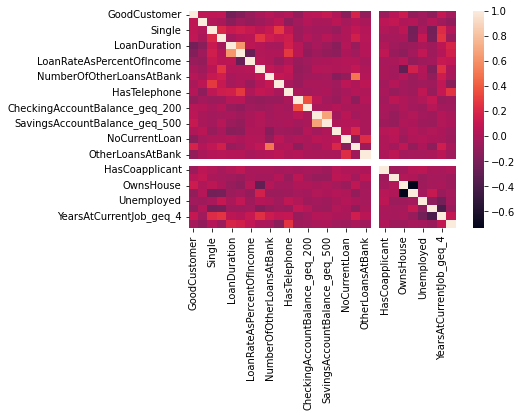

In [5]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr)
pass;

In [6]:
df["GoodCustomer"].value_counts()

 1    700
-1    300
Name: GoodCustomer, dtype: int64

In [7]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["Gender"] = ord_enc.fit_transform(df[["Gender"]])
df["PurposeOfLoan"] = ord_enc.fit_transform(df[["PurposeOfLoan"]])

In [8]:
from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [9]:
df["GoodCustomer"].replace({-1: 0, 1: 1}, inplace=True)
df

,GoodCustomer,Gender,ForeignWorker,Single,Age,LoanDuration,PurposeOfLoan,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,NumberOfOtherLoansAtBank,NumberOfLiableIndividuals,HasTelephone,CheckingAccountBalance_geq_0,CheckingAccountBalance_geq_200,SavingsAccountBalance_geq_100,SavingsAccountBalance_geq_500,MissedPayments,NoCurrentLoan,CriticalAccountOrLoansElsewhere,OtherLoansAtBank,OtherLoansAtStore,HasCoapplicant,HasGuarantor,OwnsHouse,RentsHouse,Unemployed,YearsAtCurrentJob_lt_1,YearsAtCurrentJob_geq_4,JobClassIsSkilled
0,1,1.0,0,1,67,6,2.0,1169,4,4,2,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1
1,0,0.0,0,0,22,48,2.0,5951,2,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,1,1.0,0,1,49,12,1.0,2096,2,3,1,2,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,1,1.0,0,1,45,42,3.0,7882,2,4,1,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
4,0,1.0,0,1,53,24,5.0,4870,3,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,0.0,0,0,31,12,3.0,1736,3,4,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0
996,1,1.0,0,0,40,30,9.0,3857,4,4,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
997,1,1.0,0,1,38,12,2.0,804,4,4,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
998,0,1.0,0,1,23,45,2.0,1845,4,4,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
values = df.values
 
Y = values[:,0]
X = values[:,1:30]

In [11]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
X, Y = ros.fit_resample(X, Y)

In [12]:
from sklearn import preprocessing

standard = preprocessing.StandardScaler()
x_scaled = standard.fit_transform(X)
X = pd.DataFrame(x_scaled)

In [13]:
outcome = []
model_names = []
models = [('LogReg', LogisticRegression()), 
          ('SVM', SVC()), 
          ('DecTree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('LinDisc', LinearDiscriminantAnalysis()),
          ('GaussianNB', GaussianNB()),
          ('RanForest', RandomForestClassifier())]

In [14]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=42)
    results = model_selection.cross_validate(model, X, Y, cv=k_fold_validation, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| \t Accuracy=%f Precision=%f Recall=%f F1=%f" % (model_name, results['test_accuracy'].mean(), results['test_precision_macro'].mean(), results['test_recall_macro'].mean(), results['test_f1_macro'].mean())
    print(output_message)

LogReg| 	 Accuracy=0.650714 Precision=0.609360 Recall=0.596292 F1=0.576042
SVM| 	 Accuracy=0.763571 Precision=0.675140 Recall=0.695119 F1=0.667656
DecTree| 	 Accuracy=0.823571 Precision=0.812746 Recall=0.829163 F1=0.804325
KNN| 	 Accuracy=0.719286 Precision=0.637262 Recall=0.650340 F1=0.625419
LinDisc| 	 Accuracy=0.646429 Precision=0.606352 Recall=0.591967 F1=0.572502
GaussianNB| 	 Accuracy=0.677857 Precision=0.616918 Recall=0.617830 F1=0.591718
RanForest| 	 Accuracy=0.875000 Precision=0.853348 Recall=0.873587 F1=0.857704


In [15]:
accuracy, precision, recall, f1 = [], [], [], []
for x in range(0,7):
  accuracy.append(outcome[x]['test_accuracy'])
  precision.append(outcome[x]['test_precision_macro'])
  recall.append(outcome[x]['test_recall_macro'])
  f1.append(outcome[x]['test_f1_macro'])

In [16]:
def plot_results(validation_metric, metric):
  fig = plt.figure()
  fig.suptitle('Machine Learning Model Comparison')
  ax = fig.add_subplot(111)
  plt.boxplot(validation_metric)
  plt.xlabel('Models')
  plt.ylabel(metric)
  ax.set_xticklabels(model_names)
  plt.show()

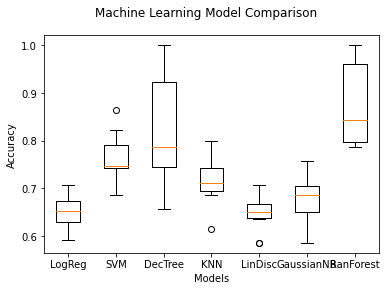

In [17]:
plot_results(accuracy, "Accuracy")

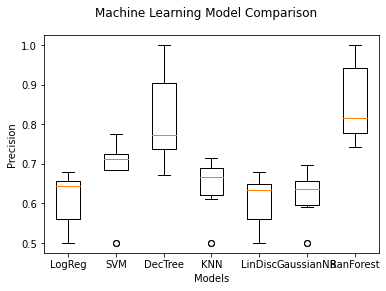

In [18]:
plot_results(precision, "Precision")

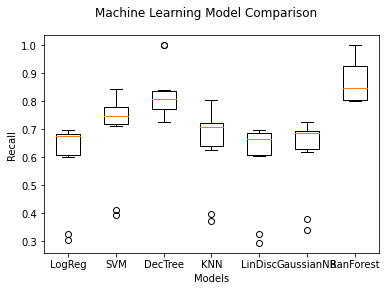

In [19]:
plot_results(recall, "Recall")

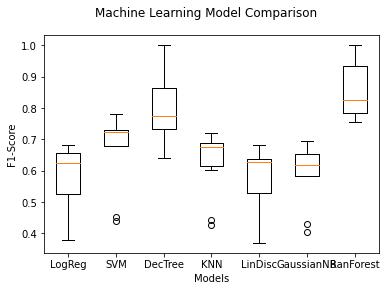

In [20]:
plot_results(f1, "F1-Score")

The top 2 models in terms of Acurracy, Precision, Recall, F1 and ROC AUC are Random Forest and Decision Tree. Let's further explore both models

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.3, random_state=2)

		Random Forest Metrics:
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       210
         1.0       0.87      0.82      0.85       210

    accuracy                           0.85       420
   macro avg       0.85      0.85      0.85       420
weighted avg       0.85      0.85      0.85       420


		Decision Tree Metrics:
               precision    recall  f1-score   support

         0.0       0.76      0.89      0.82       210
         1.0       0.87      0.71      0.78       210

    accuracy                           0.80       420
   macro avg       0.81      0.80      0.80       420
weighted avg       0.81      0.80      0.80       420



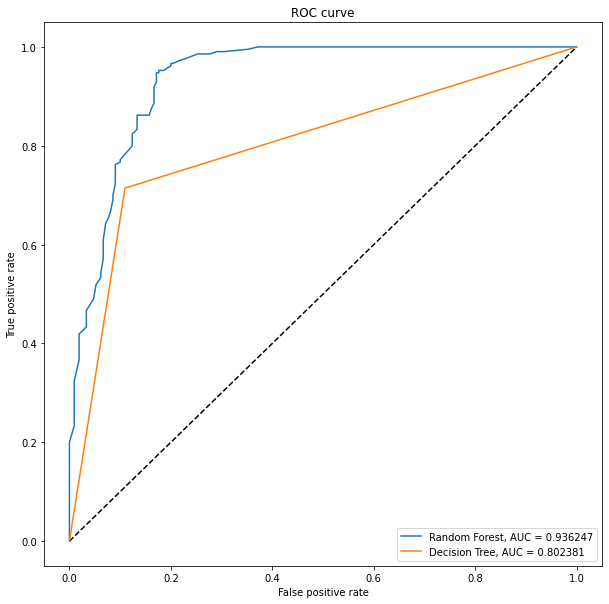

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred = rf.predict_proba(X_test)[::,1]
y_pred_rf_class = rf.predict(X_test)
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
y_pred_dt = dt.predict_proba(X_test)[::,1]
y_pred_dt_class = dt.predict(X_test)
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("\t\tRandom Forest Metrics:\n",classification_report(Y_test, y_pred_rf_class))
print("\n\t\tDecision Tree Metrics:\n",classification_report(Y_test, y_pred_dt_class))
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], 'k--')

fpr, tpr, threshold = roc_curve(Y_test, y_pred)
auc_rf = auc(fpr, tpr)
plt.plot(fpr, tpr, label='{}, AUC = {:.6f}'.format("Random Forest", auc_rf))
fpr, tpr, threshold = roc_curve(Y_test, y_pred_dt)
auc_dt = auc(fpr, tpr)
plt.plot(fpr, tpr, label='{}, AUC = {:.6f}'.format("Decision Tree", auc_dt))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();

In [23]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((980, 29), (420, 29), (980,), (420,))

In [24]:
# Calculate F Statistic and corresponding p values
F_statistic, p_values = f_classif(X_train, Y_train)
# convert to a DF
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table[ANOVA_F_table['p values'] < 0.05]

,Numerical_Feature,F-Score,p values
0,4,54.122548,0.000000e+00
1,18,49.488077,0.000000e+00
2,23,33.369284,1.020000e-08
3,17,23.984918,1.135600e-06
4,27,18.447146,1.921050e-05
5,1,17.054093,3.943320e-05
6,15,16.929178,4.206730e-05
7,24,15.230305,1.016819e-04
8,14,14.788968,1.280160e-04
9,7,12.268921,4.813979e-04


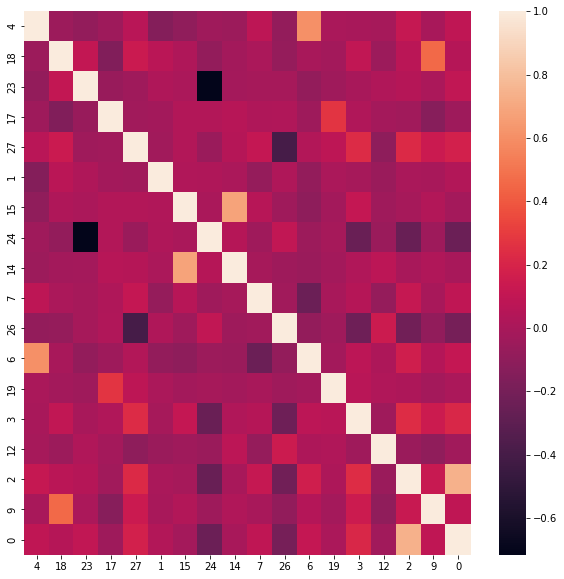

In [25]:
top_num_features = ANOVA_F_table.iloc[:18,0].to_list()
# calculate pair-wise correlations between them
corrmat = X_train[top_num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

In [26]:
drop_columns_list = ANOVA_F_table.iloc[18:, 0].to_list()

def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

# apply to X_train
col_to_drop(X_train, drop_columns_list)
col_to_drop(X_test, drop_columns_list)

In [27]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((980, 18), (420, 18), (980,), (420,))

In [28]:
X_train_prepr = X_train.copy()
Y_train_prepr = Y_train.copy()
X_test_prepr = X_test.copy()
Y_test_prepr = Y_test.copy()

In [29]:
for model_name, model in models:
    k_fold_validation = model_selection.KFold(n_splits=10, random_state=42)
    results = model_selection.cross_validate(model, X_train, Y_train, cv=k_fold_validation, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])
    outcome.append(results)
    model_names.append(model_name)
    output_message = "%s| \t Accuracy=%f Precision=%f Recall=%f F1=%f" % (model_name, results['test_accuracy'].mean(), results['test_precision_macro'].mean(), results['test_recall_macro'].mean(), results['test_f1_macro'].mean())
    print(output_message)

LogReg| 	 Accuracy=0.681633 Precision=0.683047 Recall=0.682849 F1=0.680661
SVM| 	 Accuracy=0.724490 Precision=0.730915 Recall=0.727577 F1=0.723165
DecTree| 	 Accuracy=0.760204 Precision=0.768056 Recall=0.762417 F1=0.758048
KNN| 	 Accuracy=0.675510 Precision=0.679436 Recall=0.678141 F1=0.674460
LinDisc| 	 Accuracy=0.680612 Precision=0.682219 Recall=0.681972 F1=0.679660
GaussianNB| 	 Accuracy=0.678571 Precision=0.689565 Recall=0.679557 F1=0.672904
RanForest| 	 Accuracy=0.783673 Precision=0.789173 Recall=0.786097 F1=0.782468


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

different_model_comparison = {
    "Random Forest":RandomForestClassifier(random_state=0,n_estimators=10),
    "Logistic Regression":LogisticRegression(random_state=0),
    "Decision Tree":DecisionTreeClassifier(random_state=0),
}

different_tree_number_comaprison = {
    "Random Forest(1)":RandomForestClassifier(random_state=0,n_estimators=1),
    "Random Forest(5)":RandomForestClassifier(random_state=0,n_estimators=5),
    "Random Forest(10)":RandomForestClassifier(random_state=0,n_estimators=10),
    "Random Forest(15)":RandomForestClassifier(random_state=0,n_estimators=15),
    "Random Forest(20)":RandomForestClassifier(random_state=0,n_estimators=20),
    "Random Forest(25)":RandomForestClassifier(random_state=0,n_estimators=25),
    "Random Forest(30)":RandomForestClassifier(random_state=0,n_estimators=30)
}
def train_model(model_dict,X_train,y_train):
    for model in model_dict:
        print("Training:",model)
        model_dict[model].fit(X_train,y_train)
    return model_dict

In [31]:
from sklearn import metrics
def model_eval(clf_name,clf,X_test,y_test):
    print("Evaluating:",clf_name)
    y_pred = clf.predict(X_test)
    y_score = clf.predict_proba(X_test)[:,1]
    confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['True'], colnames= ['Predicted'], margins=False)
    report = pd.Series({
        "model":clf_name,
        "precision":metrics.precision_score(y_test, y_pred),
        "recall":metrics.recall_score(y_test, y_pred),
        "f1":metrics.f1_score(y_test, y_pred),
        'roc_auc_score' : metrics.roc_auc_score(y_test, y_score)
    })
    # draw ROC 
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_score, drop_intermediate = False, pos_label = 1)
    plt.figure(1, figsize=(6,6))
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.plot(fpr, tpr,label=clf_name)
    plt.plot([0,1],[0,1], color = 'black')
    plt.legend()
    return report,confusion_matrix

def train_eval_model(model_dict,X_train,y_train,X_test,y_test):
    cols = ['model', 'roc_auc_score', 'precision', 'recall','f1']
    model_report = pd.DataFrame(columns = cols)
    cm_dict = {}
    model_dict = train_model(model_dict,X_train,y_train)
    for model in model_dict:
        report,confusion_matrix = model_eval(model,model_dict[model],X_test,y_test)
        model_report = model_report.append(report,ignore_index=True)
        cm_dict[model] = confusion_matrix
    return model_report,cm_dict

def plot_which_bar(df,col_name):
    df.set_index("model").loc[:,col_name].plot(kind='bar', stacked=True, sort_columns=True, figsize = (6,6))
    plt.title(col_name)
    plt.show()

Training: Random Forest
Training: Logistic Regression
Training: Decision Tree
Evaluating: Random Forest
Evaluating: Logistic Regression
Evaluating: Decision Tree


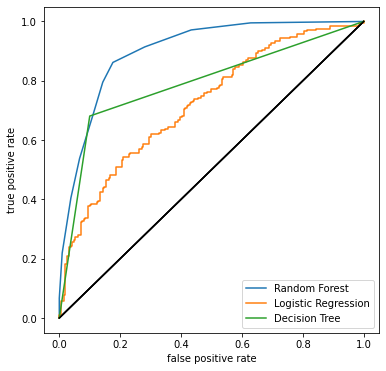

In [32]:
model_report, cm_dict = train_eval_model(different_model_comparison,X_train, Y_train, X_test, Y_test)

In [33]:
model_report

,model,roc_auc_score,precision,recall,f1
0,Random Forest,0.901327,0.861446,0.680952,0.760638
1,Logistic Regression,0.721497,0.644231,0.638095,0.641148
2,Decision Tree,0.790476,0.871951,0.680952,0.764706


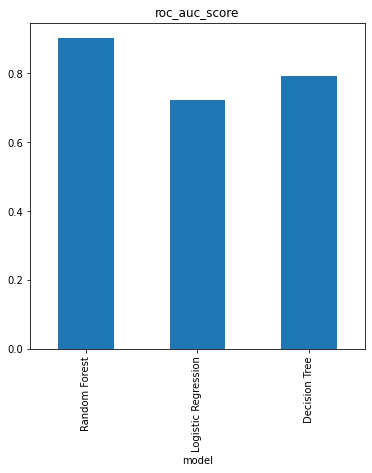

In [34]:
plot_which_bar(model_report,"roc_auc_score")

In [35]:
df = pd.read_csv('/content/ML_assesment.csv')
df["GoodCustomer"].replace({-1: 0, 1: 1}, inplace=True)
values = df.values
 
Y = values[:,0]
X = values[:,1:30]
ros = RandomOverSampler(random_state=42)
X, Y = ros.fit_resample(X, Y)

df = pd.DataFrame(X, columns=df.columns[1:30])
df['target'] = Y
df[["ForeignWorker", "Single", "Age", "LoanDuration", "LoanAmount", "LoanRateAsPercentOfIncome", "YearsAtCurrentHome", "NumberOfOtherLoansAtBank", "NumberOfLiableIndividuals", "HasTelephone", "CheckingAccountBalance_geq_0", "CheckingAccountBalance_geq_200", "SavingsAccountBalance_geq_100", "SavingsAccountBalance_geq_500", "MissedPayments", "NoCurrentLoan", "CriticalAccountOrLoansElsewhere", "OtherLoansAtBank", "OtherLoansAtStore", "HasCoapplicant", "HasGuarantor", "OwnsHouse", "RentsHouse", "Unemployed", "YearsAtCurrentJob_lt_1", "YearsAtCurrentJob_geq_4", "JobClassIsSkilled", "target"]] = df[["ForeignWorker", "Single", "Age", "LoanDuration", "LoanAmount", "LoanRateAsPercentOfIncome", "YearsAtCurrentHome",
    "NumberOfOtherLoansAtBank", "NumberOfLiableIndividuals", "HasTelephone", "CheckingAccountBalance_geq_0", "CheckingAccountBalance_geq_200", "SavingsAccountBalance_geq_100", "SavingsAccountBalance_geq_500", "MissedPayments", "NoCurrentLoan", "CriticalAccountOrLoansElsewhere", "OtherLoansAtBank", "OtherLoansAtStore", "HasCoapplicant", "HasGuarantor", "OwnsHouse", "RentsHouse", "Unemployed", "YearsAtCurrentJob_lt_1", "YearsAtCurrentJob_geq_4", "JobClassIsSkilled" ,"target"]].apply(pd.to_numeric)
df

,Gender,ForeignWorker,Single,Age,LoanDuration,PurposeOfLoan,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,NumberOfOtherLoansAtBank,NumberOfLiableIndividuals,HasTelephone,CheckingAccountBalance_geq_0,CheckingAccountBalance_geq_200,SavingsAccountBalance_geq_100,SavingsAccountBalance_geq_500,MissedPayments,NoCurrentLoan,CriticalAccountOrLoansElsewhere,OtherLoansAtBank,OtherLoansAtStore,HasCoapplicant,HasGuarantor,OwnsHouse,RentsHouse,Unemployed,YearsAtCurrentJob_lt_1,YearsAtCurrentJob_geq_4,JobClassIsSkilled,target
0,Male,0,1,67,6,Electronics,1169,4,4,2,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1
1,Female,0,0,22,48,Electronics,5951,2,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,Male,0,1,49,12,Education,2096,2,3,1,2,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1
3,Male,0,1,45,42,Furniture,7882,2,4,1,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1
4,Male,0,1,53,24,NewCar,4870,3,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,Male,0,1,28,12,Repairs,1108,4,3,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0
1396,Female,0,0,23,18,NewCar,1216,4,3,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0
1397,Male,0,1,25,45,Electronics,4746,4,2,2,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
1398,Male,0,1,41,36,Furniture,2712,2,2,1,2,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0


In [36]:
df['target'].value_counts(normalize = True)

1    0.5
0    0.5
Name: target, dtype: float64

In [37]:
X = df.drop('target', axis = 1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)
X_train, X_test = X_train.copy(), X_test.copy()

In [38]:
X_train_cat = X_train.select_dtypes(include = 'object').copy()
X_train_num = X_train.select_dtypes(include = 'number').copy()

In [39]:
chi2_check = {}

# loop over each column in the training set to calculate chi-statistic with the target variable
for column in X_train_cat:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y_train, X_train_cat[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result[chi2_result['p-value'] < 0.05]

,Feature,p-value
0,PurposeOfLoan,1.063000e-07
1,Gender,1.019135e-03


In [40]:
X_train_num.fillna(X_train_num.mean(), inplace = True)
F_statistic, p_values = f_classif(X_train_num, y_train)
ANOVA_F_table = pd.DataFrame(data = {'Numerical_Feature': X_train_num.columns.values, 'F-Score': F_statistic, 'p values': p_values.round(decimals=10)})
ANOVA_F_table.sort_values(by = ['F-Score'], ascending = False, ignore_index = True, inplace = True)
ANOVA_F_table

,Numerical_Feature,F-Score,p values
0,CriticalAccountOrLoansElsewhere,67.060723,0.000000
1,LoanDuration,51.076872,0.000000
2,OwnsHouse,24.030014,0.000001
3,NoCurrentLoan,22.534278,0.000002
4,SavingsAccountBalance_geq_500,19.133430,0.000013
5,LoanRateAsPercentOfIncome,17.873132,0.000026
6,YearsAtCurrentJob_geq_4,16.678872,0.000048
7,LoanAmount,15.407704,0.000092
8,OtherLoansAtBank,15.247760,0.000100
9,CheckingAccountBalance_geq_0,15.082971,0.000109


Keep Statistically Siginificant Data Only

In [41]:
ANOVA_F_table[ANOVA_F_table['p values'] < 0.05]

,Numerical_Feature,F-Score,p values
0,CriticalAccountOrLoansElsewhere,67.060723,0.000000
1,LoanDuration,51.076872,0.000000
2,OwnsHouse,24.030014,0.000001
3,NoCurrentLoan,22.534278,0.000002
4,SavingsAccountBalance_geq_500,19.133430,0.000013
5,LoanRateAsPercentOfIncome,17.873132,0.000026
6,YearsAtCurrentJob_geq_4,16.678872,0.000048
7,LoanAmount,15.407704,0.000092
8,OtherLoansAtBank,15.247760,0.000100
9,CheckingAccountBalance_geq_0,15.082971,0.000109


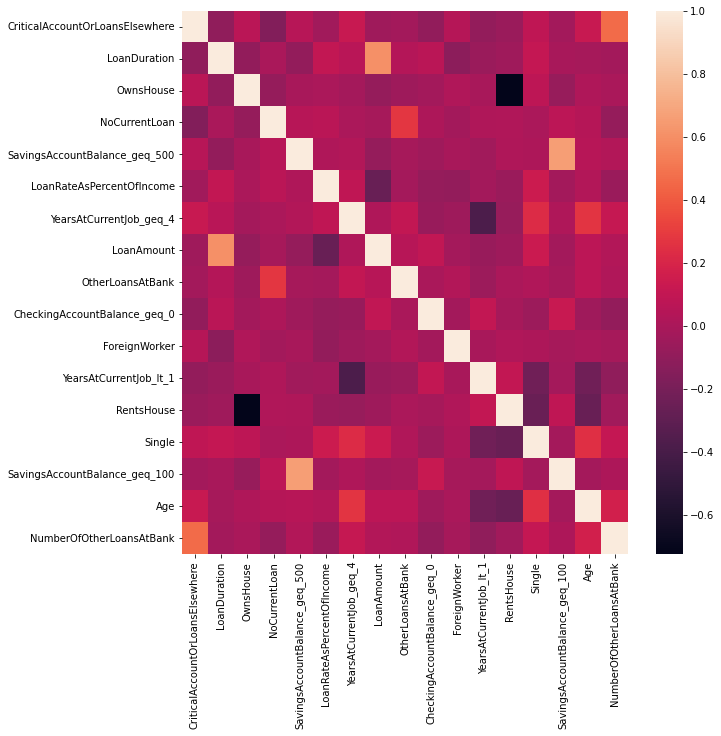

In [42]:
top_num_features = ANOVA_F_table.iloc[:17,0].to_list()
# calculate pair-wise correlations between them
corrmat = X_train_num[top_num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

In [43]:
drop_columns_list = ANOVA_F_table.iloc[17:, 0].to_list()
drop_columns_list.extend(chi2_result.iloc[2:, 0].to_list())

def col_to_drop(df, columns_list):
    df.drop(columns = columns_list, inplace = True)

# apply to X_train
col_to_drop(X_train, drop_columns_list)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 194 to 749
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           1050 non-null   object
 1   ForeignWorker                    1050 non-null   int64 
 2   Single                           1050 non-null   int64 
 3   Age                              1050 non-null   int64 
 4   LoanDuration                     1050 non-null   int64 
 5   PurposeOfLoan                    1050 non-null   object
 6   LoanAmount                       1050 non-null   int64 
 7   LoanRateAsPercentOfIncome        1050 non-null   int64 
 8   NumberOfOtherLoansAtBank         1050 non-null   int64 
 9   CheckingAccountBalance_geq_0     1050 non-null   int64 
 10  SavingsAccountBalance_geq_100    1050 non-null   int64 
 11  SavingsAccountBalance_geq_500    1050 non-null   int64 
 12  NoCurrentLoan                    

In [44]:
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    df = pd.concat([df, df_dummies], axis = 1)
    return df

X_train = dummy_creation(X_train, ['Gender', 'PurposeOfLoan'])

In [45]:
col_to_drop(X_test, drop_columns_list)
X_test = dummy_creation(X_test, ['Gender', 'PurposeOfLoan'])
X_test = X_test.reindex(labels=X_train.columns, axis=1, fill_value=0)
X_train_prepr = X_train.copy()
y_train_prepr = y_train.copy()
X_test_prepr = X_test.copy()
y_test_prepr = y_test.copy()

In [46]:
def woe_discrete(df, cat_variabe_name, y_df):
    df = pd.concat([df[cat_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [47]:
sns.set()
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [48]:
df_temp = woe_discrete(X_train_prepr, 'Gender', y_train_prepr)
df_temp

,Gender,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Female,345,0.426087,0.328571,147.0,198.0,0.28,0.377143,-0.297834,NaN,NaN,0.043012
1,Male,705,0.536170,0.671429,378.0,327.0,0.72,0.622857,0.144934,0.110083,0.442768,0.043012


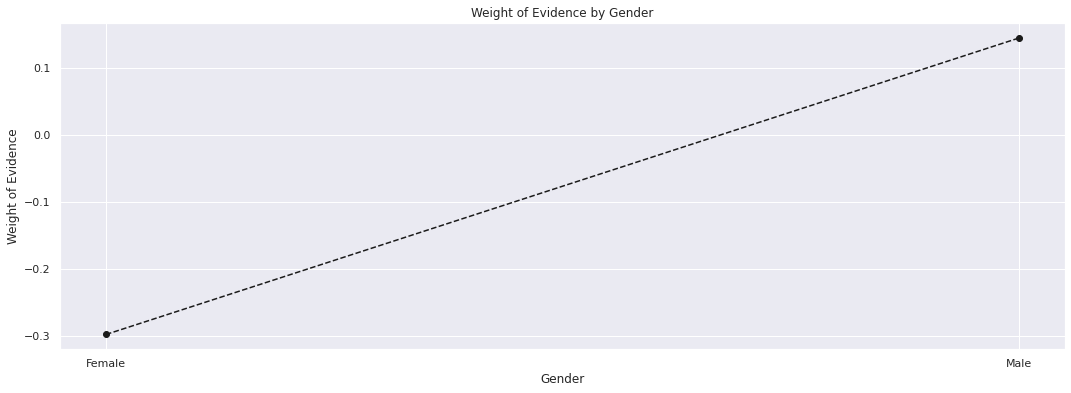

In [49]:
plot_by_woe(df_temp)

In [50]:
df_temp = woe_discrete(X_train_prepr, 'PurposeOfLoan', y_train_prepr)
df_temp

,PurposeOfLoan,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Education,58,0.362069,0.055238,21.0,37.0,0.040000,0.070476,-0.566395,NaN,NaN,0.197742
1,Other,16,0.375000,0.015238,6.0,10.0,0.011429,0.019048,-0.510826,0.012931,5.556985e-02,0.197742
2,Business,100,0.390000,0.095238,39.0,61.0,0.074286,0.116190,-0.447312,0.015000,6.351341e-02,0.197742
3,HomeAppliances,15,0.400000,0.014286,6.0,9.0,0.011429,0.017143,-0.405465,0.010000,4.184711e-02,0.197742
4,Repairs,25,0.400000,0.023810,10.0,15.0,0.019048,0.028571,-0.405465,0.000000,1.665335e-16,0.197742
5,NewCar,261,0.417625,0.248571,109.0,152.0,0.207619,0.289524,-0.332533,0.017625,7.293247e-02,0.197742
6,Furniture,201,0.482587,0.191429,97.0,104.0,0.184762,0.198095,-0.069680,0.064963,2.628527e-01,0.197742
7,Electronics,268,0.600746,0.255238,161.0,107.0,0.306667,0.203810,0.408576,0.118159,4.782555e-01,0.197742
8,UsedCar,95,0.715789,0.090476,68.0,27.0,0.129524,0.051429,0.923671,0.115043,5.150953e-01,0.197742
9,Retraining,11,0.727273,0.010476,8.0,3.0,0.015238,0.005714,0.980829,0.011483,5.715841e-02,0.197742


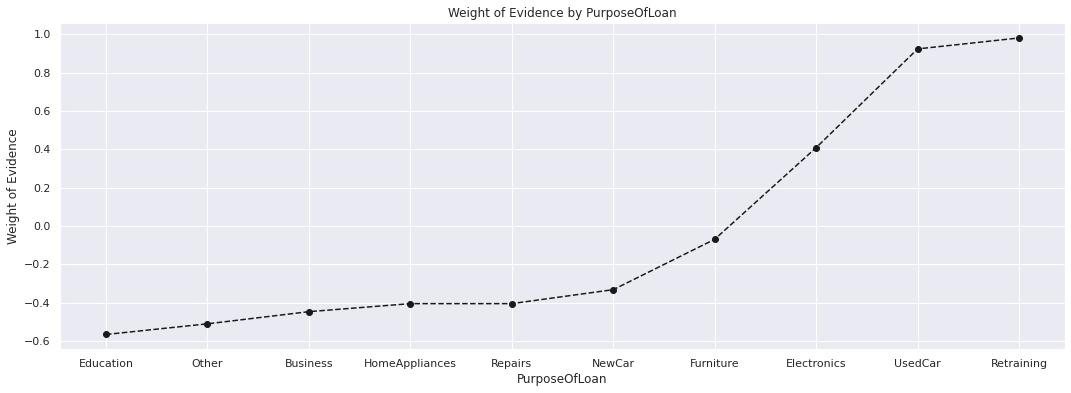

In [51]:
plot_by_woe(df_temp)

In [52]:
def woe_ordered_continuous(df, continuous_variabe_name, y_df):
    df = pd.concat([df[continuous_variabe_name], y_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [53]:
df_temp = woe_ordered_continuous(X_train_prepr, 'ForeignWorker', y_train_prepr)
df_temp

,ForeignWorker,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,1016,0.490157,0.967619,498.0,518.0,0.948571,0.986667,-0.039375,NaN,NaN,0.052926
1,1,34,0.794118,0.032381,27.0,7.0,0.051429,0.013333,1.349927,0.30396,1.389302,0.052926


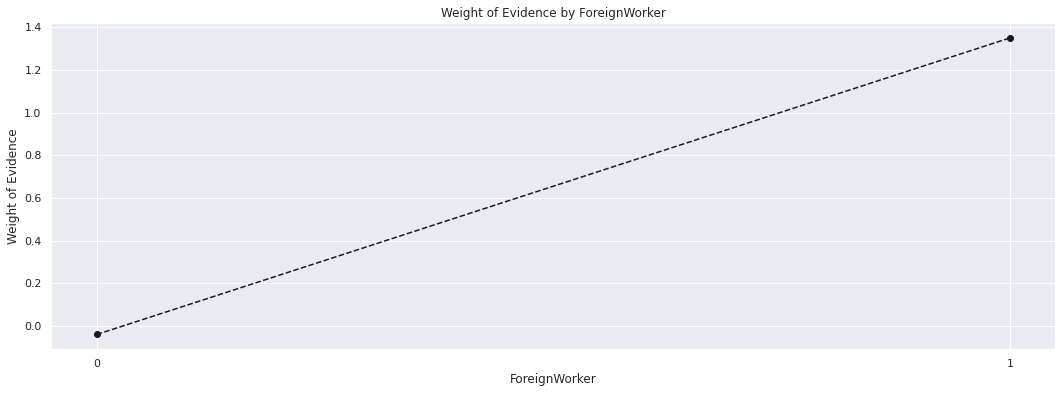

In [54]:
plot_by_woe(df_temp)

In [55]:
df_temp = woe_ordered_continuous(X_train_prepr, 'Single', y_train_prepr)
df_temp

,Single,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,494,0.449393,0.470476,222.0,272.0,0.422857,0.518095,-0.203125,NaN,NaN,0.036521
1,1,556,0.544964,0.529524,303.0,253.0,0.577143,0.481905,0.180343,0.095571,0.383468,0.036521


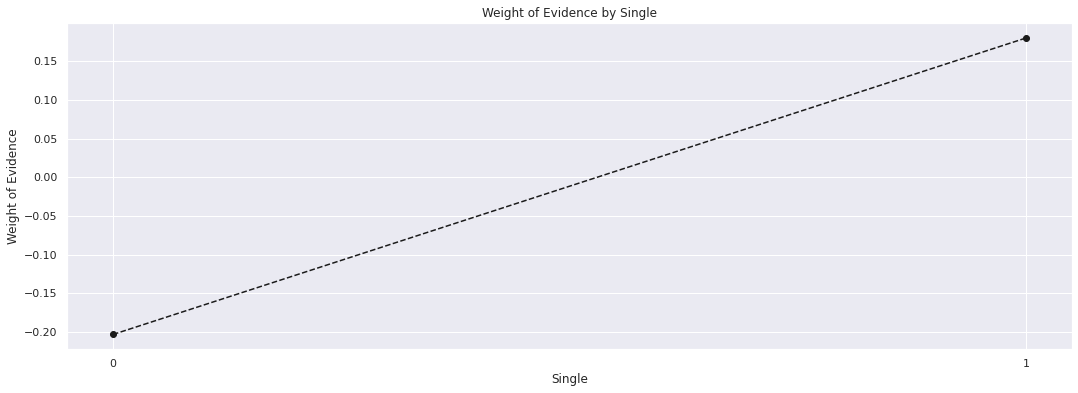

In [56]:
plot_by_woe(df_temp)

In [57]:
df_temp = woe_ordered_continuous(X_train_prepr, 'Age', y_train_prepr)
df_temp

,Age,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,19,4,0.250000,0.003810,1.0,3.0,0.001905,0.005714,-1.098612,NaN,NaN,inf
1,20,17,0.411765,0.016190,7.0,10.0,0.013333,0.019048,-0.356675,0.161765,7.419373e-01,inf
2,21,19,0.421053,0.018095,8.0,11.0,0.015238,0.020952,-0.318454,0.009288,3.822121e-02,inf
3,22,34,0.382353,0.032381,13.0,21.0,0.024762,0.040000,-0.479573,0.038700,1.611193e-01,inf
4,23,58,0.344828,0.055238,20.0,38.0,0.038095,0.072381,-0.641854,0.037525,1.622808e-01,inf
5,24,52,0.384615,0.049524,20.0,32.0,0.038095,0.060952,-0.470004,0.039788,1.718503e-01,inf
6,25,48,0.375000,0.045714,18.0,30.0,0.034286,0.057143,-0.510826,0.009615,4.082199e-02,inf
7,26,49,0.551020,0.046667,27.0,22.0,0.051429,0.041905,0.204794,0.176020,7.156200e-01,inf
8,27,50,0.560000,0.047619,28.0,22.0,0.053333,0.041905,0.241162,0.008980,3.636764e-02,inf
9,28,48,0.479167,0.045714,23.0,25.0,0.043810,0.047619,-0.083382,0.080833,3.245437e-01,inf


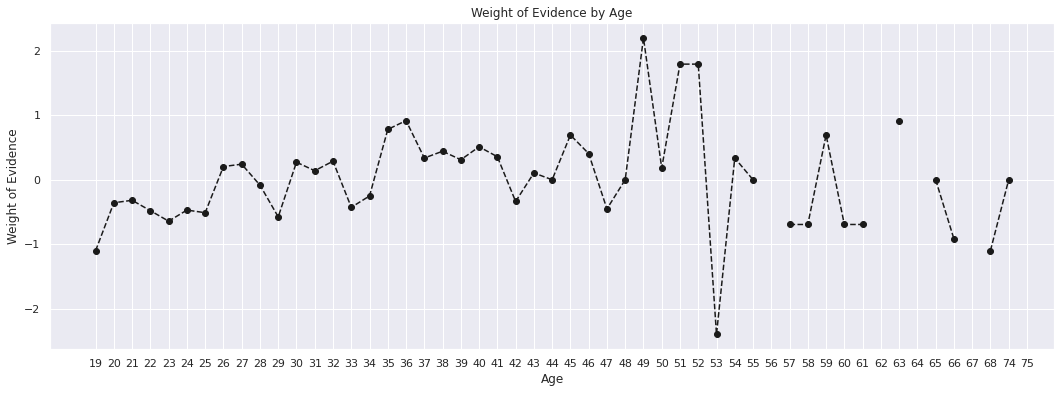

In [58]:
plot_by_woe(df_temp)

In [59]:
df_temp = woe_ordered_continuous(X_train_prepr, 'LoanDuration', y_train_prepr)
df_temp

,LoanDuration,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,4,5,1.000000,0.004762,5.0,0.0,0.009524,0.000000,inf,NaN,NaN,inf
1,5,1,1.000000,0.000952,1.0,0.0,0.001905,0.000000,inf,0.000000,NaN,inf
2,6,66,0.787879,0.062857,52.0,14.0,0.099048,0.026667,1.312186,0.212121,inf,inf
3,7,3,1.000000,0.002857,3.0,0.0,0.005714,0.000000,inf,0.212121,inf,inf
4,8,4,0.750000,0.003810,3.0,1.0,0.005714,0.001905,1.098612,0.250000,inf,inf
5,9,61,0.508197,0.058095,31.0,30.0,0.059048,0.057143,0.032790,0.241803,1.065822,inf
6,10,19,0.789474,0.018095,15.0,4.0,0.028571,0.007619,1.321756,0.281277,1.288966,inf
7,11,7,1.000000,0.006667,7.0,0.0,0.013333,0.000000,inf,0.210526,inf,inf
8,12,177,0.553672,0.168571,98.0,79.0,0.186667,0.150476,0.215520,0.446328,inf,inf
9,13,3,1.000000,0.002857,3.0,0.0,0.005714,0.000000,inf,0.446328,inf,inf


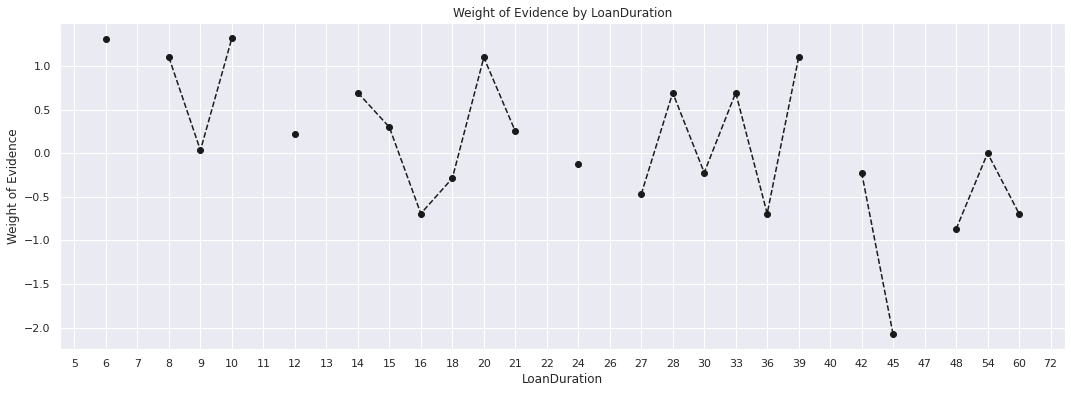

In [60]:
plot_by_woe(df_temp)

In [61]:
df_temp = woe_ordered_continuous(X_train_prepr, 'LoanAmount', y_train_prepr)
df_temp

,LoanAmount,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,250,1,1.0,0.000952,1.0,0.0,0.001905,0.000000,inf,NaN,NaN,inf
1,276,1,1.0,0.000952,1.0,0.0,0.001905,0.000000,inf,0.0,NaN,inf
2,338,1,1.0,0.000952,1.0,0.0,0.001905,0.000000,inf,0.0,NaN,inf
3,339,1,1.0,0.000952,1.0,0.0,0.001905,0.000000,inf,0.0,NaN,inf
4,343,1,1.0,0.000952,1.0,0.0,0.001905,0.000000,inf,0.0,NaN,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
763,14896,2,0.0,0.001905,0.0,2.0,0.000000,0.003810,-inf,0.0,NaN,inf
764,15672,2,0.0,0.001905,0.0,2.0,0.000000,0.003810,-inf,0.0,NaN,inf
765,15857,1,1.0,0.000952,1.0,0.0,0.001905,0.000000,inf,1.0,inf,inf
766,15945,1,0.0,0.000952,0.0,1.0,0.000000,0.001905,-inf,1.0,inf,inf


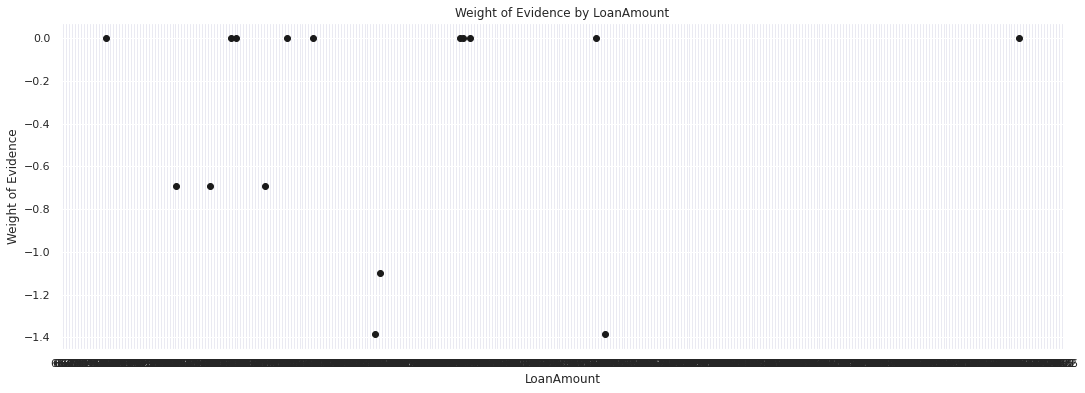

In [62]:
plot_by_woe(df_temp)

In [63]:
df_temp = woe_ordered_continuous(X_train_prepr, 'LoanRateAsPercentOfIncome', y_train_prepr)
df_temp

,LoanRateAsPercentOfIncome,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,136,0.595588,0.129524,81.0,55.0,0.154286,0.104762,0.387116,NaN,NaN,0.073202
1,2,240,0.562500,0.228571,135.0,105.0,0.257143,0.200000,0.251314,0.033088,0.135802,0.073202
2,3,163,0.539877,0.155238,88.0,75.0,0.167619,0.142857,0.159849,0.022623,0.091466,0.073202
3,4,511,0.432485,0.486667,221.0,290.0,0.420952,0.552381,-0.271718,0.107392,0.431567,0.073202


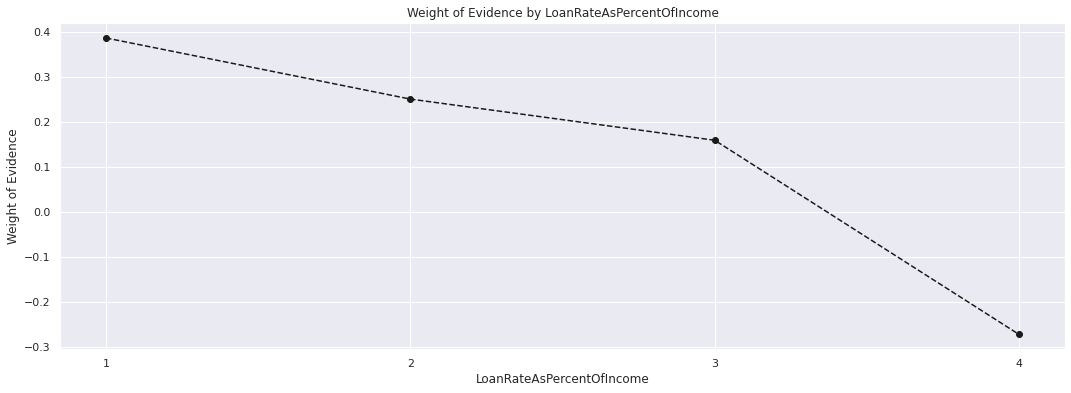

In [64]:
plot_by_woe(df_temp)

In [65]:
df_temp = woe_ordered_continuous(X_train_prepr, 'NumberOfOtherLoansAtBank', y_train_prepr)
df_temp

,NumberOfOtherLoansAtBank,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,1,680,0.470588,0.647619,320.0,360.0,0.609524,0.685714,-0.117783,NaN,NaN,0.026582
1,2,333,0.549550,0.317143,183.0,150.0,0.348571,0.285714,0.198851,0.078961,0.316634,0.026582
2,3,32,0.593750,0.030476,19.0,13.0,0.036190,0.024762,0.379490,0.044200,0.180639,0.026582
3,4,5,0.600000,0.004762,3.0,2.0,0.005714,0.003810,0.405465,0.006250,0.025975,0.026582


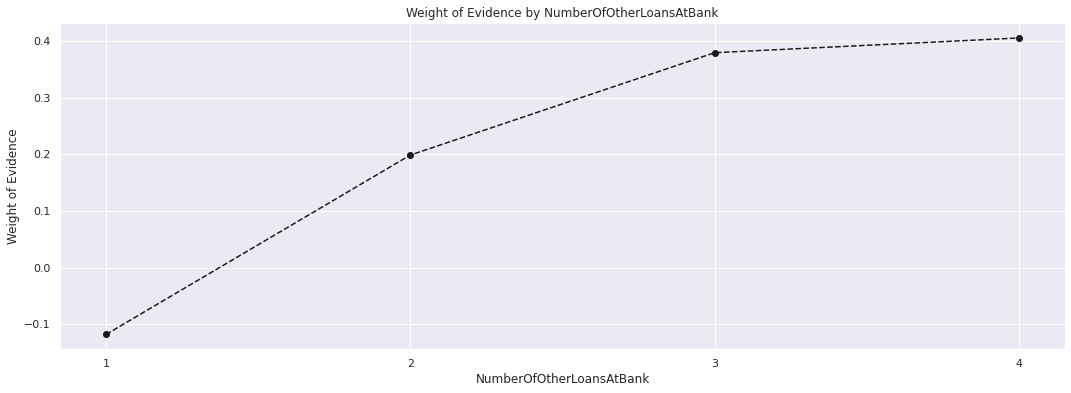

In [66]:
plot_by_woe(df_temp)

In [67]:
df_temp = woe_ordered_continuous(X_train_prepr, 'CheckingAccountBalance_geq_0', y_train_prepr)
df_temp

,CheckingAccountBalance_geq_0,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,699,0.542203,0.665714,379.0,320.0,0.721905,0.609524,0.169215,NaN,NaN,0.057159
1,1,351,0.415954,0.334286,146.0,205.0,0.278095,0.390476,-0.339403,0.126249,0.508619,0.057159


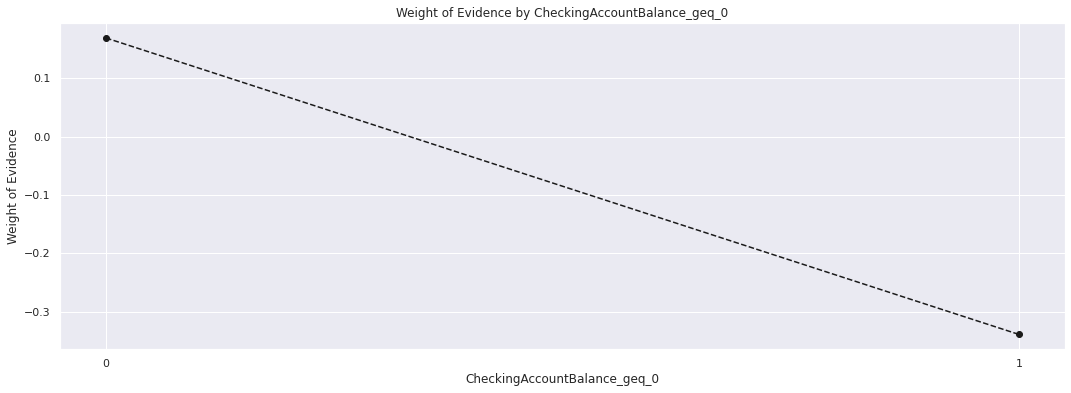

In [68]:
plot_by_woe(df_temp)

In [69]:
df_temp = woe_ordered_continuous(X_train_prepr, 'SavingsAccountBalance_geq_100', y_train_prepr)
df_temp

,SavingsAccountBalance_geq_100,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,837,0.477897,0.797143,400.0,437.0,0.761905,0.832381,-0.088469,NaN,NaN,0.03097
1,1,213,0.586854,0.202857,125.0,88.0,0.238095,0.167619,0.350977,0.108957,0.439446,0.03097


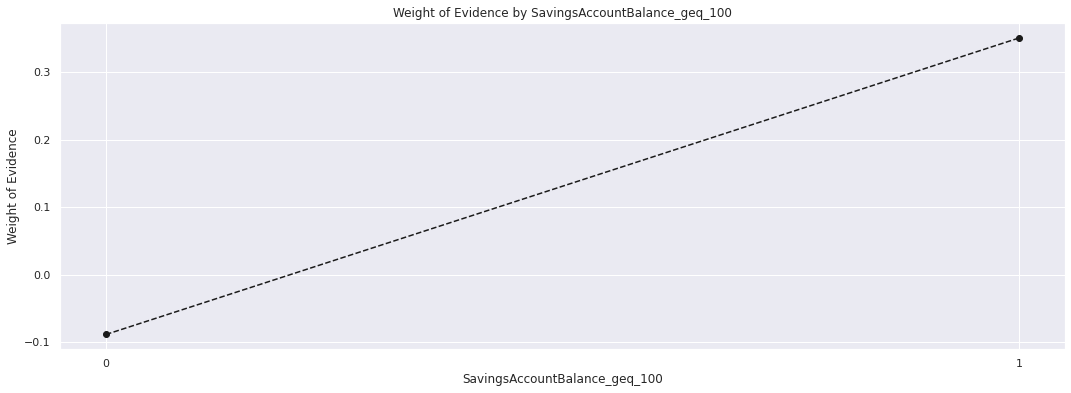

In [70]:
plot_by_woe(df_temp)

In [71]:
df_temp = woe_ordered_continuous(X_train_prepr, 'SavingsAccountBalance_geq_500', y_train_prepr)
df_temp

,SavingsAccountBalance_geq_500,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,946,0.477801,0.900952,452.0,494.0,0.860952,0.940952,-0.088853,NaN,NaN,0.075626
1,1,104,0.701923,0.099048,73.0,31.0,0.139048,0.059048,0.856472,0.224122,0.945326,0.075626


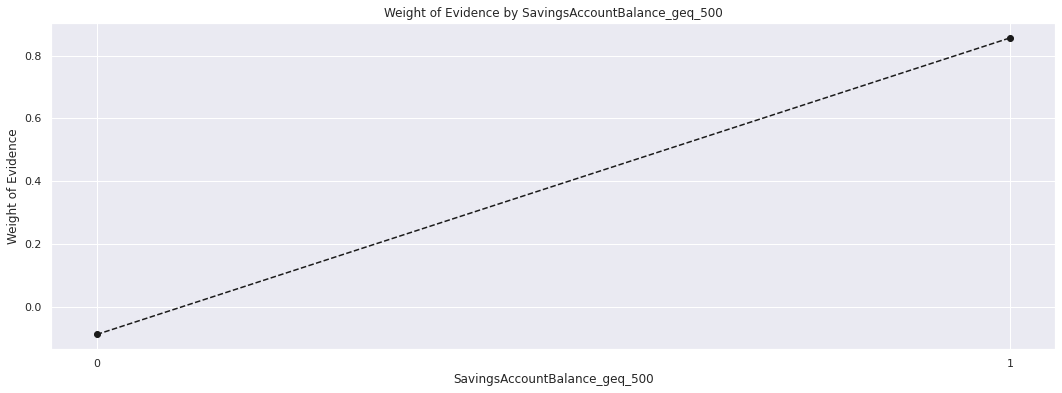

In [72]:
plot_by_woe(df_temp)

In [73]:
df_temp = woe_ordered_continuous(X_train_prepr, 'NoCurrentLoan', y_train_prepr)
df_temp

,NoCurrentLoan,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,980,0.519388,0.933333,509.0,471.0,0.969524,0.897143,0.077590,NaN,NaN,0.09366
1,1,70,0.228571,0.066667,16.0,54.0,0.030476,0.102857,-1.216395,0.290816,1.293985,0.09366


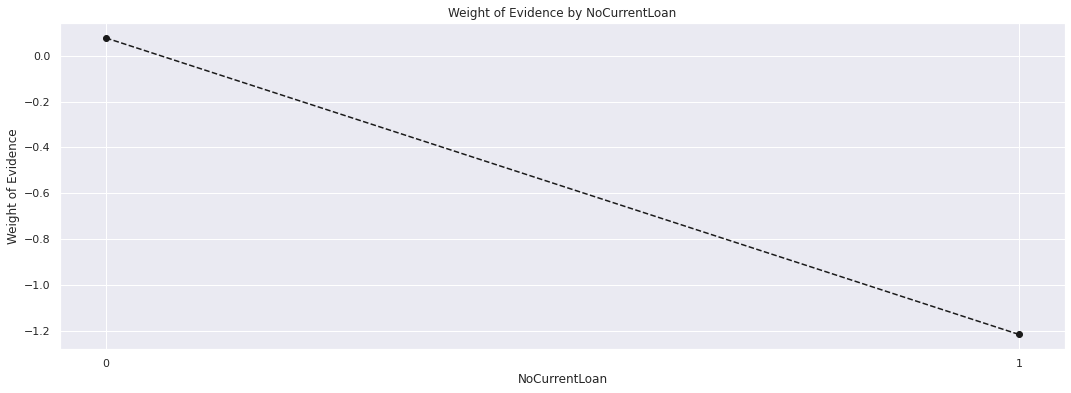

In [74]:
plot_by_woe(df_temp)

In [75]:
df_temp = woe_ordered_continuous(X_train_prepr, 'CriticalAccountOrLoansElsewhere', y_train_prepr)
df_temp

,CriticalAccountOrLoansElsewhere,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,791,0.429836,0.753333,340.0,451.0,0.647619,0.859048,-0.282522,NaN,NaN,0.253463
1,1,259,0.714286,0.246667,185.0,74.0,0.352381,0.140952,0.916291,0.28445,1.198812,0.253463


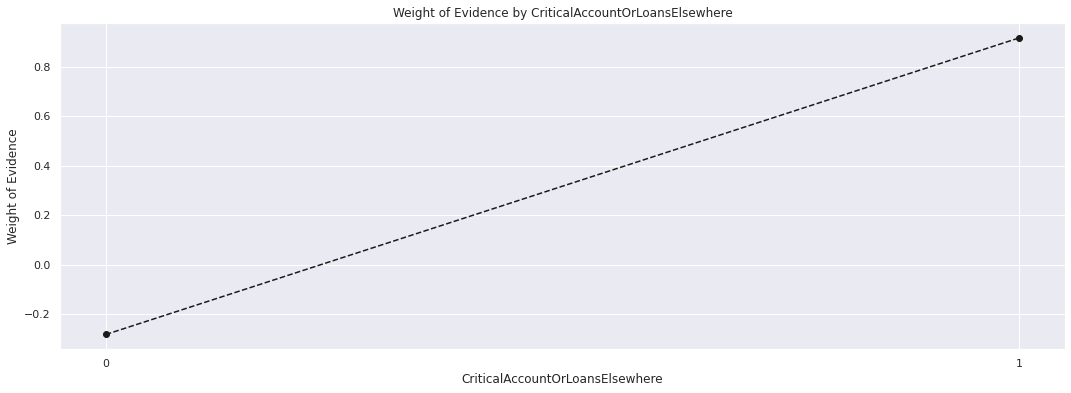

In [76]:
plot_by_woe(df_temp)

In [77]:
df_temp = woe_ordered_continuous(X_train_prepr, 'OtherLoansAtBank', y_train_prepr)
df_temp

,OtherLoansAtBank,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,900,0.524444,0.857143,472.0,428.0,0.899048,0.815238,0.097856,NaN,NaN,0.058857
1,1,150,0.353333,0.142857,53.0,97.0,0.100952,0.184762,-0.604419,0.171111,0.702275,0.058857


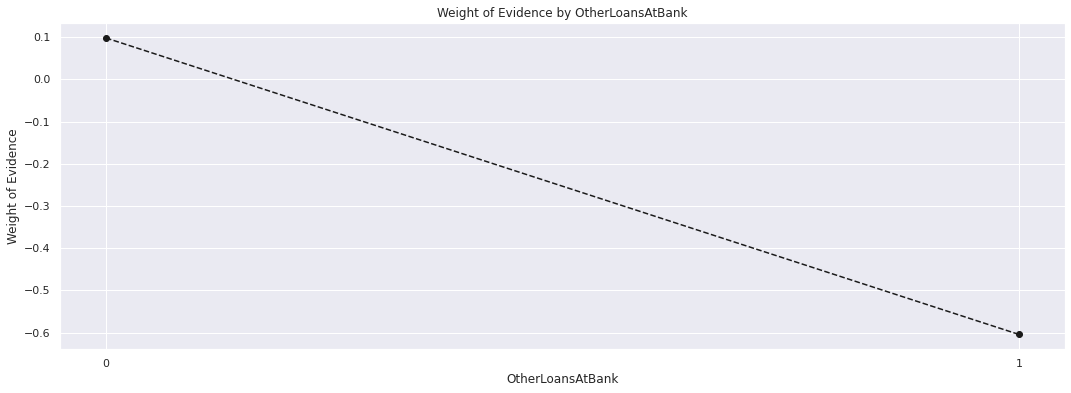

In [78]:
plot_by_woe(df_temp)

In [79]:
df_temp = woe_ordered_continuous(X_train_prepr, 'OwnsHouse', y_train_prepr)
df_temp

,OwnsHouse,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,348,0.393678,0.331429,137.0,211.0,0.260952,0.401905,-0.431877,NaN,NaN,0.090701
1,1,702,0.552707,0.668571,388.0,314.0,0.739048,0.598095,0.211612,0.159028,0.64349,0.090701


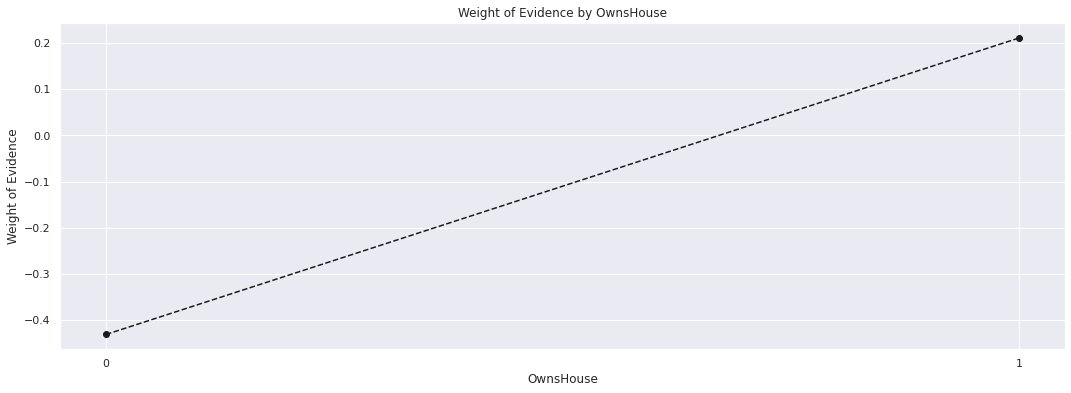

In [80]:
plot_by_woe(df_temp)

In [81]:
df_temp = woe_ordered_continuous(X_train_prepr, 'RentsHouse', y_train_prepr)
df_temp

,RentsHouse,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,833,0.525810,0.793333,438.0,395.0,0.834286,0.752381,0.103333,NaN,NaN,0.041359
1,1,217,0.400922,0.206667,87.0,130.0,0.165714,0.247619,-0.401626,0.124889,0.504959,0.041359


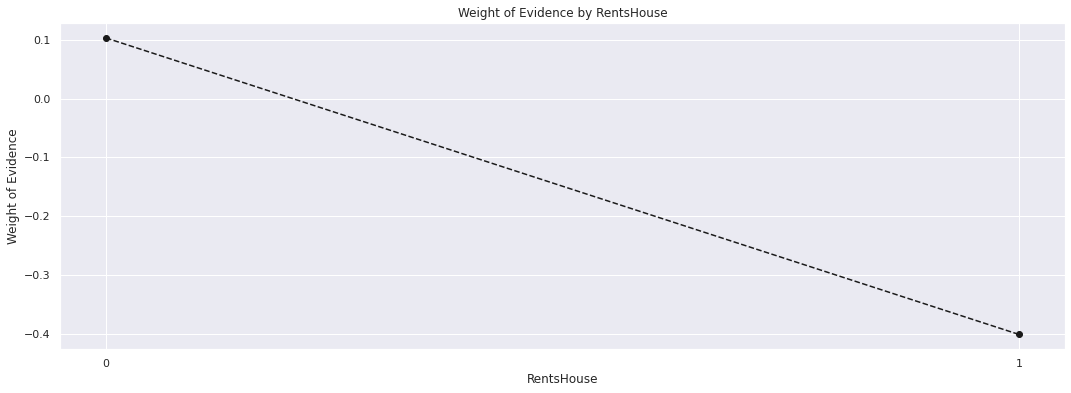

In [82]:
plot_by_woe(df_temp)

In [83]:
df_temp = woe_ordered_continuous(X_train_prepr, 'YearsAtCurrentJob_lt_1', y_train_prepr)
df_temp

,YearsAtCurrentJob_lt_1,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,854,0.524590,0.813333,448.0,406.0,0.853333,0.773333,0.098440,NaN,NaN,0.042701
1,1,196,0.392857,0.186667,77.0,119.0,0.146667,0.226667,-0.435318,0.131733,0.533758,0.042701


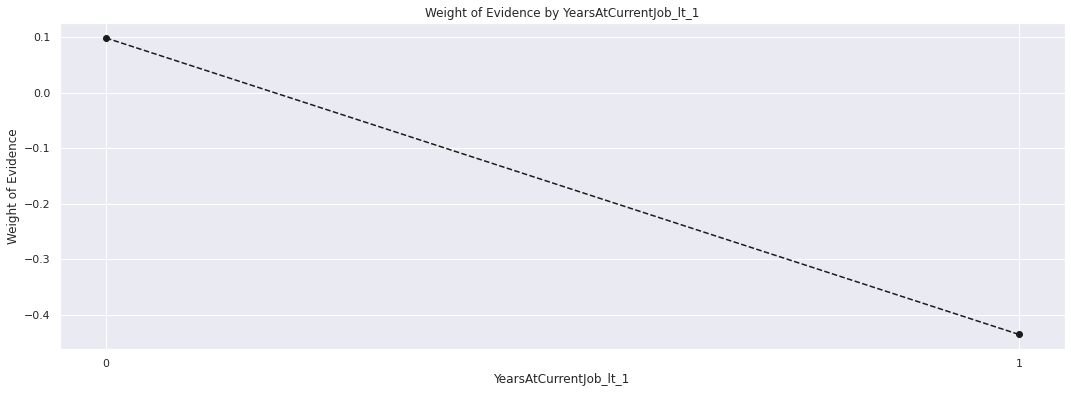

In [84]:
plot_by_woe(df_temp)

In [85]:
df_temp = woe_ordered_continuous(X_train_prepr, 'YearsAtCurrentJob_geq_4', y_train_prepr)
df_temp

,YearsAtCurrentJob_geq_4,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0,644,0.450311,0.613333,290.0,354.0,0.552381,0.674286,-0.199416,NaN,NaN,0.063066
1,1,406,0.578818,0.386667,235.0,171.0,0.447619,0.325714,0.317922,0.128507,0.517338,0.063066


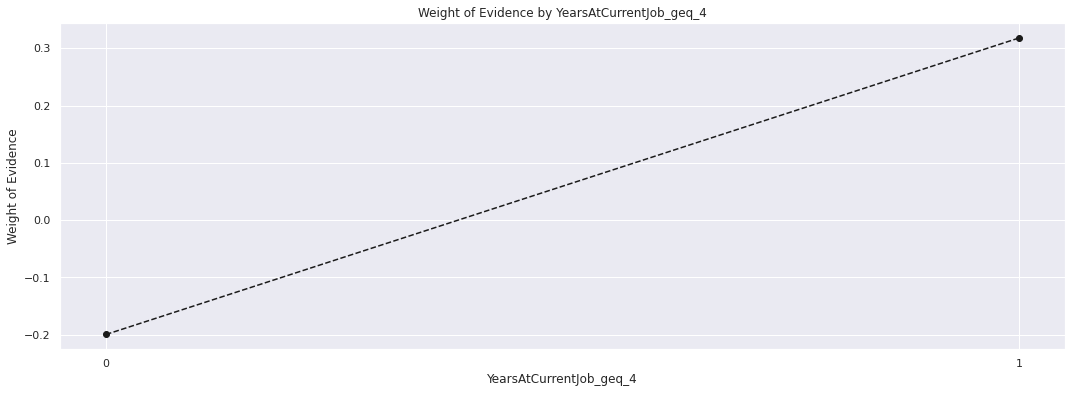

In [86]:
plot_by_woe(df_temp)

In [87]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1050 entries, 194 to 749
Data columns (total 31 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Gender                           1050 non-null   object
 1   ForeignWorker                    1050 non-null   int64 
 2   Single                           1050 non-null   int64 
 3   Age                              1050 non-null   int64 
 4   LoanDuration                     1050 non-null   int64 
 5   PurposeOfLoan                    1050 non-null   object
 6   LoanAmount                       1050 non-null   int64 
 7   LoanRateAsPercentOfIncome        1050 non-null   int64 
 8   NumberOfOtherLoansAtBank         1050 non-null   int64 
 9   CheckingAccountBalance_geq_0     1050 non-null   int64 
 10  SavingsAccountBalance_geq_100    1050 non-null   int64 
 11  SavingsAccountBalance_geq_500    1050 non-null   int64 
 12  NoCurrentLoan                    

In [88]:
ref_categories = ['Gender:Male', 'PurposeOfLoan:NewCar', 'ForeignWorker:>-1', 'Single:>-1', 
                  'Age:>-1', 'LoanDuration:>-1', 'LoanAmount:>-1', 'LoanRateAsPercentOfIncome:>-1', 'NumberOfOtherLoansAtBank:>-1', 'CheckingAccountBalance_geq_0:>-1', 
                  'SavingsAccountBalance_geq_100:>-1', 'SavingsAccountBalance_geq_500:>-1', 'NoCurrentLoan:>-1', 'CriticalAccountOrLoansElsewhere:>-1', 'OtherLoansAtBank:>-1', 
                  'RentsHouse:>-1', 'YearsAtCurrentJob_lt_1:>-1', 'YearsAtCurrentJob_geq_4:>-1']

In [89]:
X

,Gender,ForeignWorker,Single,Age,LoanDuration,PurposeOfLoan,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,NumberOfOtherLoansAtBank,NumberOfLiableIndividuals,HasTelephone,CheckingAccountBalance_geq_0,CheckingAccountBalance_geq_200,SavingsAccountBalance_geq_100,SavingsAccountBalance_geq_500,MissedPayments,NoCurrentLoan,CriticalAccountOrLoansElsewhere,OtherLoansAtBank,OtherLoansAtStore,HasCoapplicant,HasGuarantor,OwnsHouse,RentsHouse,Unemployed,YearsAtCurrentJob_lt_1,YearsAtCurrentJob_geq_4,JobClassIsSkilled
0,Male,0,1,67,6,Electronics,1169,4,4,2,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1
1,Female,0,0,22,48,Electronics,5951,2,2,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,Male,0,1,49,12,Education,2096,2,3,1,2,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
3,Male,0,1,45,42,Furniture,7882,2,4,1,2,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1
4,Male,0,1,53,24,NewCar,4870,3,4,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,Male,0,1,28,12,Repairs,1108,4,3,2,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1
1396,Female,0,0,23,18,NewCar,1216,4,3,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1
1397,Male,0,1,25,45,Electronics,4746,4,2,2,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0
1398,Male,0,1,41,36,Furniture,2712,2,2,1,2,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1


In [90]:
!pip install -q xverse
from xverse.transformer import WOE
clf = WOE()
clf.fit(X, Y)
clf.woe_df

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,Age,"(18.999, 28.0]",499,212,287,0.424850,0.575150,0.302857,0.410000,-0.302896,0.052751
1,Age,"(28.0, 37.0]",441,232,209,0.526077,0.473923,0.331429,0.298571,0.104403,0.052751
2,Age,"(37.0, 75.0]",460,256,204,0.556522,0.443478,0.365714,0.291429,0.227057,0.052751
3,CheckingAccountBalance_geq_0,0,916,487,429,0.531659,0.468341,0.695714,0.612857,0.126807,0.030461
4,CheckingAccountBalance_geq_0,1,484,213,271,0.440083,0.559917,0.304286,0.387143,-0.240827,0.030461
...,...,...,...,...,...,...,...,...,...,...,...
69,YearsAtCurrentHome,4,582,289,293,0.496564,0.503436,0.412857,0.418571,-0.013746,0.006222
70,YearsAtCurrentJob_geq_4,0,855,376,479,0.439766,0.560234,0.537143,0.684286,-0.242111,0.091919
71,YearsAtCurrentJob_geq_4,1,545,324,221,0.594495,0.405505,0.462857,0.315714,0.382581,0.091919
72,YearsAtCurrentJob_lt_1,0,1134,598,536,0.527337,0.472663,0.854286,0.765714,0.109457,0.051757


In [91]:
clf.iv_df

,Variable_Name,Information_Value
3,CriticalAccountOrLoansElsewhere,0.225113
11,LoanDuration,0.197560
20,PurposeOfLoan,0.177441
19,OwnsHouse,0.112166
14,NoCurrentLoan,0.095459
27,YearsAtCurrentJob_geq_4,0.091919
23,SavingsAccountBalance_geq_500,0.065962
21,RentsHouse,0.055804
0,Age,0.052751
4,ForeignWorker,0.051924


In [92]:
X = clf.transform(X)

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [94]:
reg = LogisticRegression(max_iter=1000, class_weight = 'balanced')
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(reg, X, y, scoring = 'roc_auc', cv = cv)
AUROC = np.mean(scores)
GINI = AUROC * 2 - 1

# print the mean AUROC score and Gini
print('Mean AUROC: %.4f' % (AUROC))
print('Gini: %.4f' % (GINI))

Mean AUROC: 0.7708
Gini: 0.5415


In [95]:
X_train_woe_transformed = clf.fit_transform(X_train, y_train)
feature_name = X_train_woe_transformed.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)

In [96]:
helper = X_train_woe_transformed.describe()
helper = helper.loc['max']

In [97]:
summary_table['Coefficients'] = helper.iloc[:].values + 1
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', (X_train_woe_transformed.CriticalAccountOrLoansElsewhere.std())]
summary_table.sort_index(inplace = True)
summary_table

,Feature name,Coefficients
0,Intercept,0.517020
1,Gender,1.144934
2,ForeignWorker,2.349927
3,Single,1.180343
4,Age,1.175891
5,LoanDuration,1.501572
6,PurposeOfLoan,1.929536
7,LoanAmount,1.179249
8,LoanRateAsPercentOfIncome,1.387116
9,YearsAtCurrentHome,1.251314


In [98]:
reg.fit(X_train, y_train)
y_hat_test = reg.predict(X_test)
y_hat_test_proba = reg.predict_proba(X_test)
y_hat_test_proba = y_hat_test_proba[:][: , 1]

In [99]:
y_test_temp = y_test.copy()
y_test_temp.reset_index(drop = True, inplace = True)
y_test_proba = pd.concat([y_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
y_test_proba.shape

(350, 2)

In [100]:
y_test_proba.columns = ['y_test_class_actual', 'y_hat_test_proba']
# Makes the index of one dataframe equal to the index of another dataframe.
y_test_proba.index = X_test.index
y_test_proba.head()

,y_test_class_actual,y_hat_test_proba
956,1,0.697046
732,1,0.652290
997,1,0.776905
580,0,0.586116
918,0,0.663782


In [101]:
tr = 0.5
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

array([[0.37142857, 0.12857143],
       [0.16285714, 0.33714286]])

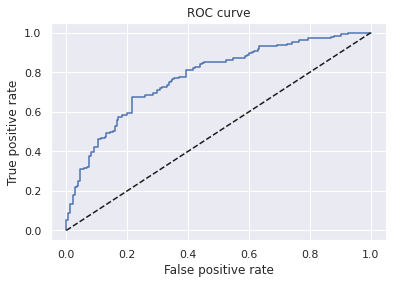

In [102]:
fpr, tpr, thresholds = roc_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
# plot the ROC curve
plt.plot(fpr, tpr)
# plot a secondary diagonal line, with dashed line style and black color to represent a no-skill classifier
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
pass;

In [103]:
AUROC = roc_auc_score(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
AUROC

0.7753795918367348

In [104]:
Gini = AUROC * 2 - 1
Gini

0.5507591836734695

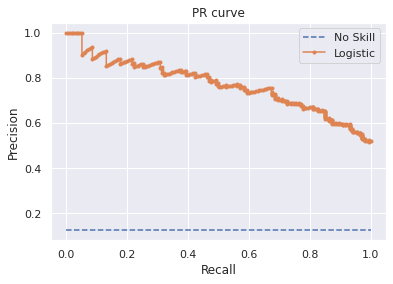

In [105]:
no_skill = len(y_test[y_test == 1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
precision, recall, thresholds = precision_recall_curve(y_test_proba['y_test_class_actual'], y_test_proba['y_hat_test_proba'])
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('PR curve');

In [106]:
auc_pr = auc(recall, precision)
auc_pr

0.7711062767166491

In [107]:
summary_table

,Feature name,Coefficients
0,Intercept,0.517020
1,Gender,1.144934
2,ForeignWorker,2.349927
3,Single,1.180343
4,Age,1.175891
5,LoanDuration,1.501572
6,PurposeOfLoan,1.929536
7,LoanAmount,1.179249
8,LoanRateAsPercentOfIncome,1.387116
9,YearsAtCurrentHome,1.251314


In [108]:
min_score = 300
max_score = 850

In [109]:
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories

,Feature name,Coefficients
0,Gender:Male,0
1,PurposeOfLoan:NewCar,0
2,ForeignWorker:>-1,0
3,Single:>-1,0
4,Age:>-1,0
5,LoanDuration:>-1,0
6,LoanAmount:>-1,0
7,LoanRateAsPercentOfIncome:>-1,0
8,NumberOfOtherLoansAtBank:>-1,0
9,CheckingAccountBalance_geq_0:>-1,0


In [110]:
df_scorecard = pd.concat([summary_table, df_ref_categories])
df_scorecard.reset_index(inplace = True)
df_scorecard

,index,Feature name,Coefficients
0,0,Intercept,0.517020
1,1,Gender,1.144934
2,2,ForeignWorker,2.349927
3,3,Single,1.180343
4,4,Age,1.175891
5,5,LoanDuration,1.501572
6,6,PurposeOfLoan,1.929536
7,7,LoanAmount,1.179249
8,8,LoanRateAsPercentOfIncome,1.387116
9,9,YearsAtCurrentHome,1.251314


In [111]:
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,Original feature name
0,0,Intercept,0.517020,Intercept
1,1,Gender,1.144934,Gender
2,2,ForeignWorker,2.349927,ForeignWorker
3,3,Single,1.180343,Single
4,4,Age,1.175891,Age
5,5,LoanDuration,1.501572,LoanDuration
6,6,PurposeOfLoan,1.929536,PurposeOfLoan
7,7,LoanAmount,1.179249,LoanAmount
8,8,LoanRateAsPercentOfIncome,1.387116,LoanRateAsPercentOfIncome
9,9,YearsAtCurrentHome,1.251314,YearsAtCurrentHome


In [112]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
df_scorecard.loc[0, 'Score - Calculation'] = np.abs(((df_scorecard.loc[0,'Coefficients'] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score)
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,0.517020,Intercept,41.003865,41.0
1,1,Gender,1.144934,Gender,24.946933,25.0
2,2,ForeignWorker,2.349927,ForeignWorker,51.202482,51.0
3,3,Single,1.180343,Single,25.718465,26.0
4,4,Age,1.175891,Age,25.621446,26.0
5,5,LoanDuration,1.501572,LoanDuration,32.717716,33.0
6,6,PurposeOfLoan,1.929536,PurposeOfLoan,42.042601,42.0
7,7,LoanAmount,1.179249,LoanAmount,25.694629,26.0
8,8,LoanRateAsPercentOfIncome,1.387116,LoanRateAsPercentOfIncome,30.223828,30.0
9,9,YearsAtCurrentHome,1.251314,YearsAtCurrentHome,27.264852,27.0


In [113]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()

In [114]:
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,0.517020,Intercept,41.003865,41.0,-0.003865
1,1,Gender,1.144934,Gender,24.946933,25.0,0.053067
2,2,ForeignWorker,2.349927,ForeignWorker,51.202482,51.0,-0.202482
3,3,Single,1.180343,Single,25.718465,26.0,0.281535
4,4,Age,1.175891,Age,25.621446,26.0,0.378554
5,5,LoanDuration,1.501572,LoanDuration,32.717716,33.0,0.282284
6,6,PurposeOfLoan,1.929536,PurposeOfLoan,42.042601,42.0,-0.042601
7,7,LoanAmount,1.179249,LoanAmount,25.694629,26.0,0.305371
8,8,LoanRateAsPercentOfIncome,1.387116,LoanRateAsPercentOfIncome,30.223828,30.0,-0.223828
9,9,YearsAtCurrentHome,1.251314,YearsAtCurrentHome,27.264852,27.0,-0.264852


In [115]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard.loc[0, 'Score - Final'] = 234

In [116]:
X_test_woe_transformed = X
X_test_woe_transformed.insert(0, 'Intercept', 1)
X_test_woe_transformed.head()

,Intercept,Gender,ForeignWorker,Single,Age,LoanDuration,PurposeOfLoan,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,NumberOfOtherLoansAtBank,NumberOfLiableIndividuals,HasTelephone,CheckingAccountBalance_geq_0,CheckingAccountBalance_geq_200,SavingsAccountBalance_geq_100,SavingsAccountBalance_geq_500,MissedPayments,NoCurrentLoan,CriticalAccountOrLoansElsewhere,OtherLoansAtBank,OtherLoansAtStore,HasCoapplicant,HasGuarantor,OwnsHouse,RentsHouse,Unemployed,YearsAtCurrentJob_lt_1,YearsAtCurrentJob_geq_4,JobClassIsSkilled
0,1,0.107813,-0.036796,0.155810,0.227057,0.536493,0.421650,0.047118,-0.191741,-0.013746,0.181492,0.010204,0.078612,0.126807,-0.02428,-0.083903,-0.082325,0.004699,0.078081,0.858332,0.082608,0.0,0.019389,-0.025508,0.231719,0.118418,0.012177,0.109457,0.382581,-0.003690
1,1,-0.226124,-0.036796,-0.177837,-0.302896,-0.559616,0.421650,-0.219290,0.106018,-0.064242,-0.103048,0.010204,-0.052393,-0.240827,-0.02428,-0.083903,-0.082325,0.004699,0.078081,-0.267234,0.082608,0.0,0.019389,-0.025508,0.231719,0.118418,0.012177,0.109457,-0.242111,-0.003690
2,1,0.107813,-0.036796,0.155810,0.227057,0.536493,-0.619039,0.172097,0.106018,0.009479,-0.103048,-0.053584,-0.052393,0.126807,-0.02428,-0.083903,-0.082325,0.004699,0.078081,0.858332,0.082608,0.0,0.019389,-0.025508,0.231719,0.118418,0.012177,0.109457,0.382581,0.012658
3,1,0.107813,-0.036796,0.155810,0.227057,-0.559616,-0.143643,-0.219290,0.106018,-0.013746,-0.103048,-0.053584,-0.052393,0.126807,-0.02428,-0.083903,-0.082325,0.004699,0.078081,-0.267234,0.082608,0.0,0.019389,0.518794,-0.488615,0.118418,0.012177,0.109457,0.382581,-0.003690
4,1,0.107813,-0.036796,0.155810,0.227057,-0.182322,-0.341386,-0.219290,0.164622,-0.013746,0.181492,-0.053584,-0.052393,0.126807,-0.02428,-0.083903,-0.082325,-0.048790,0.078081,-0.267234,0.082608,0.0,0.019389,-0.025508,-0.488615,0.118418,0.012177,0.109457,-0.242111,-0.003690


In [117]:
scorecard_scores = df_scorecard['Score - Final']
print(X_test_woe_transformed.shape)
print(scorecard_scores.shape)

(1400, 30)
(48,)


In [118]:
X_test_woe_transformed = pd.concat([X_test_woe_transformed, pd.DataFrame(dict.fromkeys(ref_categories, [0] * len(X_test_woe_transformed)), 
                                                                         index = X_test_woe_transformed.index)], axis = 1)
scorecard_scores = scorecard_scores.values.reshape(48, 1)
print(X_test_woe_transformed.shape)
print(scorecard_scores.shape)

(1400, 48)
(48, 1)


In [119]:
X_test_woe_transformed

,Intercept,Gender,ForeignWorker,Single,Age,LoanDuration,PurposeOfLoan,LoanAmount,LoanRateAsPercentOfIncome,YearsAtCurrentHome,NumberOfOtherLoansAtBank,NumberOfLiableIndividuals,HasTelephone,CheckingAccountBalance_geq_0,CheckingAccountBalance_geq_200,SavingsAccountBalance_geq_100,SavingsAccountBalance_geq_500,MissedPayments,NoCurrentLoan,CriticalAccountOrLoansElsewhere,OtherLoansAtBank,OtherLoansAtStore,HasCoapplicant,HasGuarantor,OwnsHouse,RentsHouse,Unemployed,YearsAtCurrentJob_lt_1,YearsAtCurrentJob_geq_4,JobClassIsSkilled,Gender:Male,PurposeOfLoan:NewCar,ForeignWorker:>-1,Single:>-1,Age:>-1,LoanDuration:>-1,LoanAmount:>-1,LoanRateAsPercentOfIncome:>-1,NumberOfOtherLoansAtBank:>-1,CheckingAccountBalance_geq_0:>-1,SavingsAccountBalance_geq_100:>-1,SavingsAccountBalance_geq_500:>-1,NoCurrentLoan:>-1,CriticalAccountOrLoansElsewhere:>-1,OtherLoansAtBank:>-1,RentsHouse:>-1,YearsAtCurrentJob_lt_1:>-1,YearsAtCurrentJob_geq_4:>-1
0,1,0.107813,-0.036796,0.155810,0.227057,0.536493,0.421650,0.047118,-0.191741,-0.013746,0.181492,0.010204,0.078612,0.126807,-0.02428,-0.083903,-0.082325,0.004699,0.078081,0.858332,0.082608,0.0,0.019389,-0.025508,0.231719,0.118418,0.012177,0.109457,0.382581,-0.003690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,-0.226124,-0.036796,-0.177837,-0.302896,-0.559616,0.421650,-0.219290,0.106018,-0.064242,-0.103048,0.010204,-0.052393,-0.240827,-0.02428,-0.083903,-0.082325,0.004699,0.078081,-0.267234,0.082608,0.0,0.019389,-0.025508,0.231719,0.118418,0.012177,0.109457,-0.242111,-0.003690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0.107813,-0.036796,0.155810,0.227057,0.536493,-0.619039,0.172097,0.106018,0.009479,-0.103048,-0.053584,-0.052393,0.126807,-0.02428,-0.083903,-0.082325,0.004699,0.078081,0.858332,0.082608,0.0,0.019389,-0.025508,0.231719,0.118418,0.012177,0.109457,0.382581,0.012658,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.107813,-0.036796,0.155810,0.227057,-0.559616,-0.143643,-0.219290,0.106018,-0.013746,-0.103048,-0.053584,-0.052393,0.126807,-0.02428,-0.083903,-0.082325,0.004699,0.078081,-0.267234,0.082608,0.0,0.019389,0.518794,-0.488615,0.118418,0.012177,0.109457,0.382581,-0.003690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0.107813,-0.036796,0.155810,0.227057,-0.182322,-0.341386,-0.219290,0.164622,-0.013746,0.181492,-0.053584,-0.052393,0.126807,-0.02428,-0.083903,-0.082325,-0.048790,0.078081,-0.267234,0.082608,0.0,0.019389,-0.025508,-0.488615,0.118418,0.012177,0.109457,-0.242111,-0.003690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1,0.107813,-0.036796,0.155810,-0.302896,0.536493,-0.356675,0.047118,-0.191741,0.009479,0.181492,0.010204,-0.052393,0.126807,-0.02428,-0.083903,-0.082325,0.004699,0.078081,-0.267234,0.082608,0.0,0.019389,-0.025508,0.231719,0.118418,0.012177,0.109457,0.382581,-0.003690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1396,1,-0.226124,-0.036796,-0.177837,-0.302896,-0.182322,-0.341386,0.047118,-0.191741,0.009479,-0.103048,0.010204,0.078612,0.126807,-0.02428,-0.083903,-0.082325,0.004699,0.078081,-0.267234,0.082608,0.0,0.019389,-0.025508,-0.488615,-0.473438,0.012177,-0.474894,-0.242111,-0.003690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1397,1,0.107813,-0.036796,0.155810,-0.302896,-0.559616,0.421650,-0.219290,-0.191741,-0.064242,0.181492,0.010204,-0.052393,-0.240827,-0.02428,-0.083903,-0.082325,0.004699,0.078081,0.858332,0.082608,0.0,0.019389,-0.025508,0.231719,0.118418,0.012177,-0.474894,-0.242111,0.012658,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1398,1,0.107813,-0.036796,0.155810,0.227057,-0.559616,-0.143643,0.172097,0.106018,-0.064242,-0.103048,-0.053584,-0.052393,0.126807,-0.02428,-0.083903,-0.082325,0.004699,0.078081,-0.267234,-0.468478,0.0,0.019389,-0.025508,0.231719,0.118418,0.012177,0.109457,0.382581,-0.003690,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [120]:
y_scores = X_test_woe_transformed.dot(scorecard_scores) * len(scorecard_scores.shape)
y_scores.head()

,0
0,684.666783
1,378.913856
2,596.850357
3,438.413579
4,400.972938


In [121]:
J = tpr - fpr
ix = np.argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold: %f' % (best_thresh))

Best Threshold: 0.298462


In [122]:
tr = best_thresh
y_test_proba['y_test_class_predicted'] = np.where(y_test_proba['y_hat_test_proba'] > tr, 1, 0)
confusion_matrix(y_test_proba['y_test_class_actual'], y_test_proba['y_test_class_predicted'], normalize = 'all')

array([[0.18571429, 0.31428571],
       [0.04285714, 0.45714286]])

In [123]:
df_cutoffs = pd.DataFrame(thresholds, columns = ['thresholds'])
df_cutoffs['Score'] = np.abs(((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) - min_sum_coef) * 
                       ((max_score - min_score) / (max_sum_coef - min_sum_coef)) * len(scorecard_scores.shape))).round()
df_cutoffs.head()

,thresholds,Score
0,0.149470,616.0
1,0.150707,616.0
2,0.151042,616.0
3,0.155640,614.0
4,0.156849,614.0


In [124]:
def n_approved(p):
    return np.where(y_test_proba['y_hat_test_proba'] >= p, 1, 0).sum()

In [125]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = y_test_proba['y_hat_test_proba'].shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = df_cutoffs['N Approved'] / y_test_proba['y_hat_test_proba'].shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
df_cutoffs.head()

,thresholds,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,0.149470,616.0,337,13,0.962857,0.037143
1,0.150707,616.0,336,14,0.960000,0.040000
2,0.151042,616.0,334,16,0.954286,0.045714
3,0.155640,614.0,333,17,0.951429,0.048571
4,0.156849,614.0,332,18,0.948571,0.051429


In [126]:
df_cutoffs[df_cutoffs['thresholds'].between(0.149470, 0.19658)]

,thresholds,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
1,0.150707,616.0,336,14,0.960000,0.040000
2,0.151042,616.0,334,16,0.954286,0.045714
3,0.155640,614.0,333,17,0.951429,0.048571
4,0.156849,614.0,332,18,0.948571,0.051429
5,0.157342,614.0,331,19,0.945714,0.054286
6,0.158443,613.0,330,20,0.942857,0.057143
7,0.162763,612.0,326,24,0.931429,0.068571
8,0.165939,611.0,325,25,0.928571,0.071429
9,0.167100,611.0,324,26,0.925714,0.074286
10,0.170020,610.0,323,27,0.922857,0.077143


Analytical Assessment Below

In [127]:
df = pd.read_excel('/content/analytical_assessment1.xlsx')
df

,Member ID,Account ID,amount,currency_id,description,transaction_date,post_date,transaction_base_type,transaction_category_id,transaction_category_name,merchant_name,chain_name,transaction_origin
0,1000564014008900,1000564016697310,61.73,152,CHEVRON XXXXXXX DAHLONEGA GA,2014-07-02,2014-07-02,debit,8,Gasoline/Fuel,Chevron,Chevron,Physical
1,1000564014008900,1000564016697310,15.11,152,SHELL OIL XXXXXXXXXQPS DAHLONEGA GA,2014-07-03,2014-07-03,debit,8,Gasoline/Fuel,Shell,NaN,Physical
2,1000564014008900,1000564016697310,63.20,152,SHELL OIL XXXXXXXXXQPS POOLER GA,2014-07-05,2014-07-05,debit,8,Gasoline/Fuel,Shell,NaN,Physical
3,1000564014008900,1000564016697310,54.12,152,SPRINT FOODS # 1 BEECH ISLAND SC,2014-07-07,2014-07-07,debit,8,Gasoline/Fuel,Sprint Food Stores,NaN,Physical
4,1000564014008900,1000564016697310,42.91,152,CHEVRON XXXXXXX DAHLONEGA GA,2014-07-10,2014-07-10,debit,8,Gasoline/Fuel,Chevron,Chevron,Physical
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215427,1001235642339030,1001235614549520,15.00,152,SHELL OIL XXXXXXXXXXX MARTINEZ CA,2016-05-25,2016-05-25,debit,8,Gasoline/Fuel,Shell,NaN,NaN
215428,1001235642339030,1001235614549520,200.00,152,ONLINE PAYMENT,2016-06-02,2016-06-02,credit,26,Credit Card Payments,NaN,NaN,NaN
215429,1001235642339030,1001235614549520,29.08,152,HANABI SUSHI MARTINEZ CA,2016-06-04,2016-06-04,debit,22,Restaurants/Dining,Hanabi Sushi,NaN,NaN
215430,1001235642339030,1001235614549520,7.99,152,Netflix.com Netflix.com CA,2016-06-04,2016-06-04,debit,7,Entertainment,Netflix,NaN,NaN


In [128]:
credit_payments = df[df['transaction_base_type'] == 'credit']
debit_payments = df[df['transaction_base_type'] != 'credit']

Credit Card Payments = Transaction Category Id: 26

In [129]:
q2 = credit_payments.groupby(['Member ID', 'transaction_category_id']).count()
q2

Account ID  ...  transaction_origin
Member ID        transaction_category_id              ...                    
1000564014008900 1                                 1  ...                   1
                 22                                1  ...                   1
                 26                               48  ...                  34
                 28                                1  ...                   1
                 32                                1  ...                   1
...                                              ...  ...                 ...
1001235642126160 96                                1  ...                   1
1001235642339030 15                                1  ...                   1
                 26                               46  ...                  36
                 32                                3  ...                   3
                 44                                1  ...                   1

[2236 rows x 11 columns]

In [130]:
df = q2[~q2.index.get_level_values('transaction_category_id').isin([26])]
df

Account ID  ...  transaction_origin
Member ID        transaction_category_id              ...                    
1000564014008900 1                                 1  ...                   1
                 22                                1  ...                   1
                 28                                1  ...                   1
                 32                                1  ...                   1
                 44                                1  ...                   0
...                                              ...  ...                 ...
1001235642126160 28                                1  ...                   1
                 96                                1  ...                   1
1001235642339030 15                                1  ...                   1
                 32                                3  ...                   3
                 44                                1  ...                   1

[1894 rows x 11 columns]

In [131]:
df = df.reset_index()
df

,Member ID,transaction_category_id,Account ID,amount,currency_id,description,transaction_date,post_date,transaction_base_type,transaction_category_name,merchant_name,chain_name,transaction_origin
0,1000564014008900,1,1,1,1,1,1,1,1,1,0,0,1
1,1000564014008900,22,1,1,1,1,1,1,1,1,1,0,1
2,1000564014008900,28,1,1,1,1,1,1,1,1,1,0,1
3,1000564014008900,32,1,1,1,1,1,1,1,1,1,0,1
4,1000564014008900,44,1,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1889,1001235642126160,28,1,1,1,1,1,0,1,1,1,0,1
1890,1001235642126160,96,1,1,1,1,1,0,1,1,1,0,1
1891,1001235642339030,15,1,1,1,1,1,1,1,1,1,0,1
1892,1001235642339030,32,3,3,3,3,3,3,3,3,3,0,3


In [132]:
defaulted_card_members = list(df['Member ID'].unique())
defaulted_card_members

[1000564014008900,
 1000564014018540,
 1000564014026170,
 1000564014040220,
 1000564014049610,
 1000564014072880,
 1000564014082990,
 1000564014098700,
 1000564014110350,
 1000564014122280,
 1000564014125590,
 1000564014142160,
 1000564014175760,
 1000564014178320,
 1000564014187760,
 1000564014189980,
 1000564014213130,
 1000564014217690,
 1000564014219670,
 1000564014236280,
 1000564014250300,
 1000564014277060,
 1000564014278050,
 1000564014284490,
 1000564014288010,
 1000564014302680,
 1000564014307600,
 1000564014309900,
 1000564014317980,
 1000564014318670,
 1000564014390350,
 1000564014392440,
 1000564014410190,
 1000564014411150,
 1000564014439730,
 1000564014455940,
 1000564014465910,
 1000564014479000,
 1000564014486050,
 1000564014491020,
 1000564014504350,
 1000564014515770,
 1000564014517080,
 1000564014517190,
 1000564014518450,
 1000564014521470,
 1000564014522830,
 1000564014527830,
 1000564014543250,
 1000564014545310,
 1000564014545360,
 1000564014551470,
 10005640145

In [133]:
print('Total defaulted members:', len(defaulted_card_members))

Total defaulted members: 329


In [134]:
with open('defaulters.txt', 'w') as f:
    for item in defaulted_card_members:
        f.write("%s\n" % item)